In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#1. Информация о наборе данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Исходные данные.csv',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#2. Changed_Credit_Limit - ошибочные записи заменить на пропуски

In [ ]:
df['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [ ]:
df['Changed_Credit_Limit'].replace('_',np.nan,inplace=True)
df['Changed_Credit_Limit'].unique()

array(['11.27', nan, '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

#3 Преобразовть в числовой формат

In [ ]:
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')
df['Changed_Credit_Limit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Changed_Credit_Limit
Non-Null Count  Dtype  
--------------  -----  
97909 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


#4. Credit_History_Age - в числовой формат(месяцы)

In [ ]:
df['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

In [ ]:
def conv(value:str):
  x=value
  c_value=[i for i in x.split() if i.isdigit()]
  c_value=int(c_value[0])*12+int(c_value[1])
  return c_value

In [ ]:
df['Credit_History_Age']=df['Credit_History_Age'].map(conv,na_action='ignore')
df['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

#5. Num_of_Loan - заменить аномальные значения пропусками

In [ ]:
df['Num_of_Loan'].unique()[:20]

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_'], dtype=object)

In [ ]:
df['Num_of_Loan']=df['Num_of_Loan'].map(lambda x: x if x.isdigit() and int(x)>=0 else np.nan)
df['Num_of_Loan']=pd.to_numeric(df['Num_of_Loan'],errors='coerce')

In [ ]:
df['Num_of_Loan'].unique()[:10]

array([  4.,   1.,   3., 967.,  nan,   0.,   2.,   7.,   5.,   6.])

#6 Changed_Credit_Limit, Name - восстановить пропущенные значения и сравнить распределение до и после; Type_of_Loan - восстановить пропущенные значения

In [ ]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].round(decimals=1)
df_ccl_before=df['Changed_Credit_Limit'].copy()

In [ ]:
print(df['Name'].isna().sum())
print(df['Changed_Credit_Limit'].isna().sum())
print(df['Type_of_Loan'].isna().sum())

9985
2091
11408


In [ ]:
for i in range(8,len(df['Name']),8):
  df['Name'].iloc[i-8:i].fillna(df['Name'].iloc[i-8:i].mode()[0],inplace=True)
  df['Changed_Credit_Limit'].iloc[i-8:i].fillna(df['Changed_Credit_Limit'].iloc[i-8:i].mean(),inplace=True)
  #df['Type_of_Loan'].iloc[i-8:i].fillna(df['Type_of_Loan'].iloc[i-8:i].mode(dropna=df['Type_of_Loan'].iloc[i-8:i].any())[0],inplace=True)
  #по какой-то причине не работает (хотя на тестах всё ок)
df['Type_of_Loan'].fillna(df['Type_of_Loan'].mode()[0],inplace=True)

In [ ]:
print(df['Name'].isna().sum())
print(df['Changed_Credit_Limit'].isna().sum())
print(df['Type_of_Loan'].isna().sum())

0
0
0


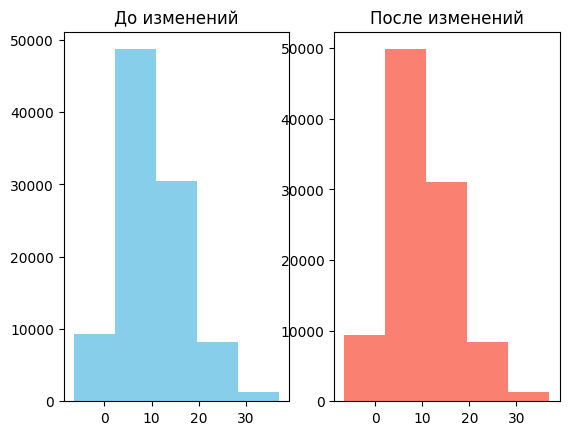

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df_ccl_before, bins=5, color='skyblue')
ax1.set_title('До изменений')
ax2.hist(df['Changed_Credit_Limit'], bins=5, color='salmon')
ax2.set_title('После изменений')
plt.show()

#7. Amount_invested_monthly - определить наличие статистических выбросов

In [ ]:
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce').round(decimals=1)

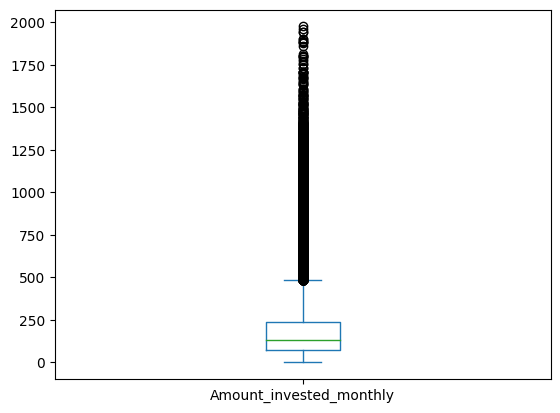

In [ ]:
df['Amount_invested_monthly'].plot.box()
plt.show()

In [ ]:
Q1=df['Amount_invested_monthly'].quantile(0.25)
Q3=df['Amount_invested_monthly'].quantile(0.75)
IQR=Q3-Q1
l_bound=Q1-1.5*IQR
u_bound=Q3-1.5*IQR
out=df['Amount_invested_monthly'][(df['Amount_invested_monthly']<l_bound)|(df['Amount_invested_monthly']>u_bound)]
print(out)

0         80.4
1        118.3
2         81.7
3        199.5
4         41.4
         ...  
99995     61.0
99996     54.2
99997     24.0
99998    251.7
99999    167.2
Name: Amount_invested_monthly, Length: 91216, dtype: float64


#8 Credit_Mix - закодировать

In [ ]:
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df['Credit_Mix'].replace('_','None',inplace=True)

In [ ]:
df['Credit_Mix'].isna().sum()

0

In [ ]:
encoded=pd.get_dummies(df['Credit_Mix'],prefix='Credit_Structure')
df=pd.concat([df,encoded],axis=1)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Structure_Bad,Credit_Structure_Good,Credit_Structure_None,Credit_Structure_Standard
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,No,49.574949,80.4,High_spent_Small_value_payments,312.49408867943663,Good,False,False,True,False
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,No,49.574949,118.3,Low_spent_Large_value_payments,284.62916249607184,Good,False,True,False,False
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,No,49.574949,81.7,Low_spent_Medium_value_payments,331.2098628537912,Good,False,True,False,False
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,No,49.574949,199.5,Low_spent_Small_value_payments,223.45130972736786,Good,False,True,False,False
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,No,49.574949,41.4,High_spent_Medium_value_payments,341.48923103222177,Good,False,True,False,False


#9 Amount_invested_monthly - эмпирическое распределение

In [ ]:
df['Amount_invested_monthly'].isna().sum()

8784

In [ ]:
for i in range(8,len(df['Amount_invested_monthly']),8):
  df['Amount_invested_monthly'].iloc[i-8:i].fillna(df['Amount_invested_monthly'].iloc[i-8:i].mean(),inplace=True)

In [ ]:
df['Amount_invested_monthly'].isna().sum()

0

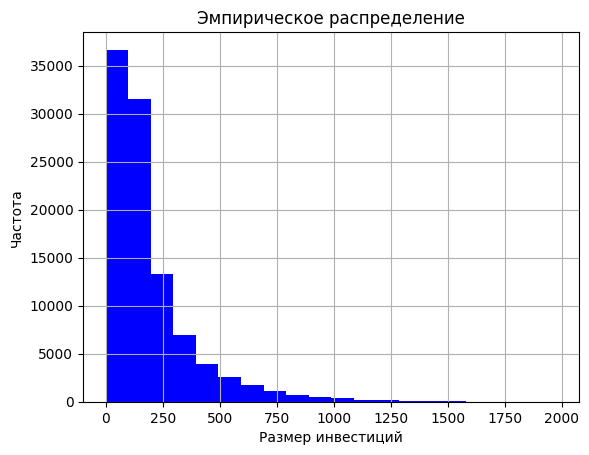

In [ ]:
df['Amount_invested_monthly'].hist(bins=20, color='blue')
plt.title('Эмпирическое распределение')
plt.xlabel('Размер инвестиций')
plt.ylabel('Частота')
plt.show()

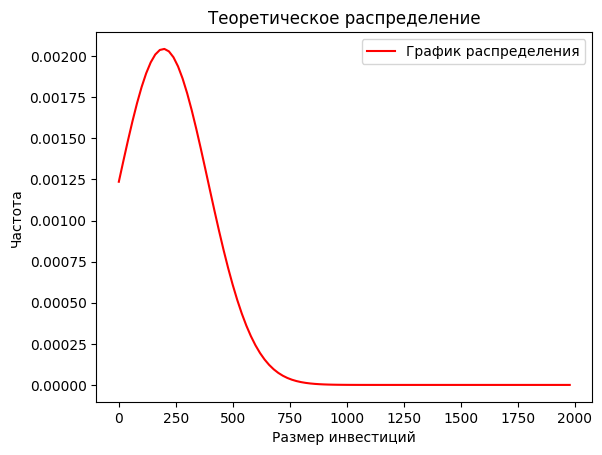

In [ ]:
mean=df['Amount_invested_monthly'].mean()
std=df['Amount_invested_monthly'].std()
x = np.linspace(df['Amount_invested_monthly'].min(), df['Amount_invested_monthly'].max(), 100)
y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std)**2)
plt.plot(x, y, 'r', label='График распределения')
plt.title('Теоретическое распределение')
plt.xlabel('Размер инвестиций')
plt.ylabel('Частота')
plt.legend()
plt.show()

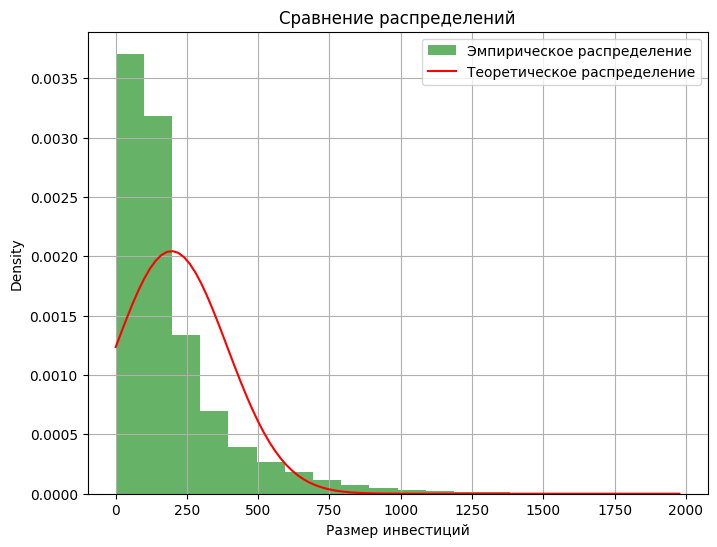

In [ ]:
plt.figure(figsize=(8, 6))
df['Amount_invested_monthly'].hist(bins=20, density=True, alpha=0.6, color='g', label='Эмпирическое распределение')
plt.plot(x, y, 'r', label='Теоретическое распределение')
plt.title('Сравнение распределений')
plt.xlabel('Размер инвестиций')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
data = df['Amount_invested_monthly']
expected_freqs = np.ones_like(counts) * len(data) / len(counts)
chi_squared_statistic = ((counts - expected_freqs) ** 2 / expected_freqs).sum()
print(chi_squared_statistic)

417490.15599999996


In [ ]:
stats.chisquare

In [ ]:
'''
хи-квадрат запредельно высок, следовательно:
либо есть какая-то ошибка в вычислениях, либо фактическое распределение данных существенно отличается от ожидаемого
существенные различия чётко видны на графиках, значит правильным вариантом будет второй
'''

'\nхи-квадрат запредельно высок, следовательно:\nлибо есть какая-то ошибка в вычислениях, либо фактическое распределение данных существенно отличается от ожидаемого\nсущественные различия чётко видны на графиках, значит правильным вариантом будет второй\n'

#10. Два количественных признака (Amount_invested_monthly,Changed_Credit_Limit)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       100000 non-null  object 
 4   Age                        100000 non-null  object 
 5   SSN                        100000 non-null  object 
 6   Occupation                 100000 non-null  object 
 7   Annual_Income              100000 non-null  object 
 8   Monthly_Inhand_Salary      84998 non-null   float64
 9   Num_Bank_Accounts          100000 non-null  int64  
 10  Num_Credit_Card            100000 non-null  int64  
 11  Interest_Rate              100000 non-null  int64  
 12  Num_of_Loan                91339 non-null   float64
 13  Type_of_Loan               100

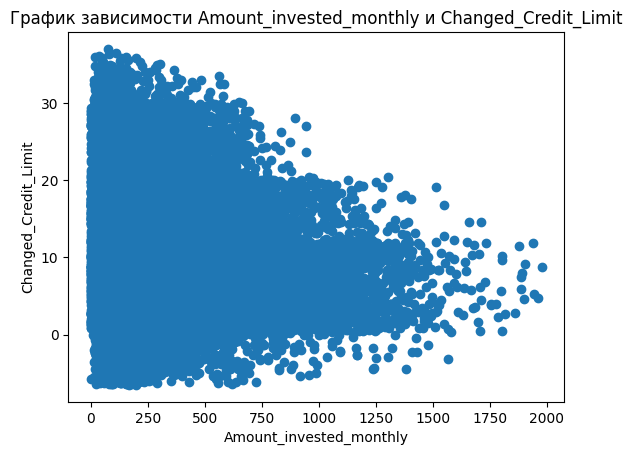

In [ ]:
plt.scatter(df['Amount_invested_monthly'], df['Changed_Credit_Limit'])
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Changed_Credit_Limit')
plt.title('График зависимости Amount_invested_monthly и Changed_Credit_Limit')
plt.show()

In [ ]:
'''
из графика видим что чем меньше человек инвестировал ежемесячно, тем меньше изменялся его кредитный лимит до какой-то отметки.
после этой отметки ситуация противоположная
'''

'\nиз графика видим что чем меньше человек инвестировал ежемесячно, тем меньше изменялся его кредитный лимит до какой-то отметки.\nпосле этой отметки ситуация противоположная\n'

In [ ]:
def pearson_correlation(x, y):
  n = len(x)
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  numerator = np.sum((x - mean_x) * (y - mean_y))
  denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
  return numerator / denominator

def spearman_correlation(x, y):
  rank_x = pd.Series(x).rank().values
  rank_y = pd.Series(y).rank().values
  return pearson_correlation(rank_x, rank_y)

from scipy.stats import kendalltau
def kendall_correlation(x, y):
  tau, _ = kendalltau(x, y)
  return tau

In [ ]:
x = df['Amount_invested_monthly']
y = df['Changed_Credit_Limit']

pearson_corr = pearson_correlation(x, y)
spearman_corr = spearman_correlation(x, y)
kendall_corr = kendall_correlation(x, y)

print(f"Pearson correlation (custom): {pearson_corr}")
print(f"Spearman correlation (custom): {spearman_corr}")
print(f"Kendall correlation (custom): {kendall_corr}")

Pearson correlation (custom): -0.11637393784239945
Spearman correlation (custom): -0.11196619881342895
Kendall correlation (custom): -0.07488198500814754


In [ ]:
'''
по коэффициентам наблюдаем слабую отрицательную зависимость
'''

'\nпо коэффициентам наблюдаем слабую отрицательную зависимость\n'

#11. 1 количественный(Amount_invested_monthly), 1 категориальный(Credit_Score)

In [ ]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
df['Credit_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Credit_Score
Non-Null Count   Dtype 
--------------   ----- 
100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


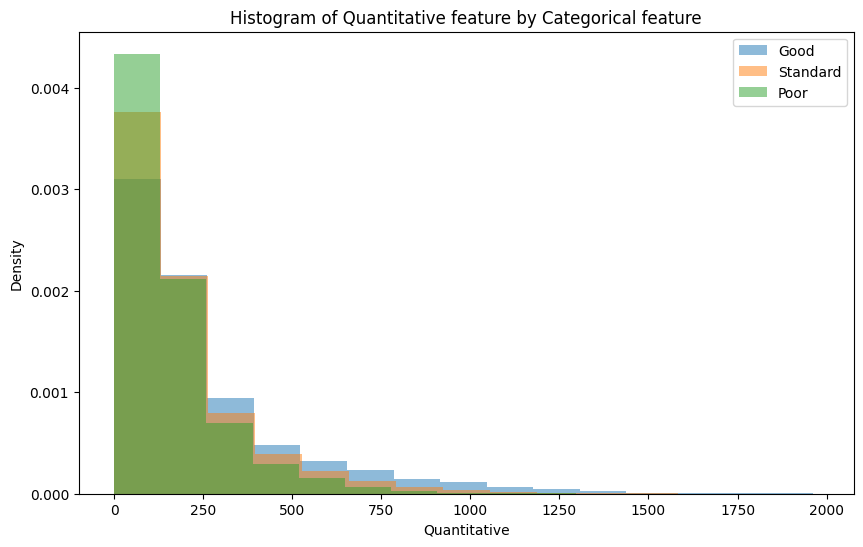

In [ ]:
categories = df['Credit_Score'].unique()
plt.figure(figsize=(10, 6))
for category in categories:
    subset = df[df['Credit_Score'] == category]
    plt.hist(subset['Amount_invested_monthly'], bins=15, alpha=.5, label=category, density=True)
plt.title('Histogram of Quantitative feature by Categorical feature')
plt.xlabel('Quantitative')
plt.ylabel('Density')
plt.legend()
plt.show()

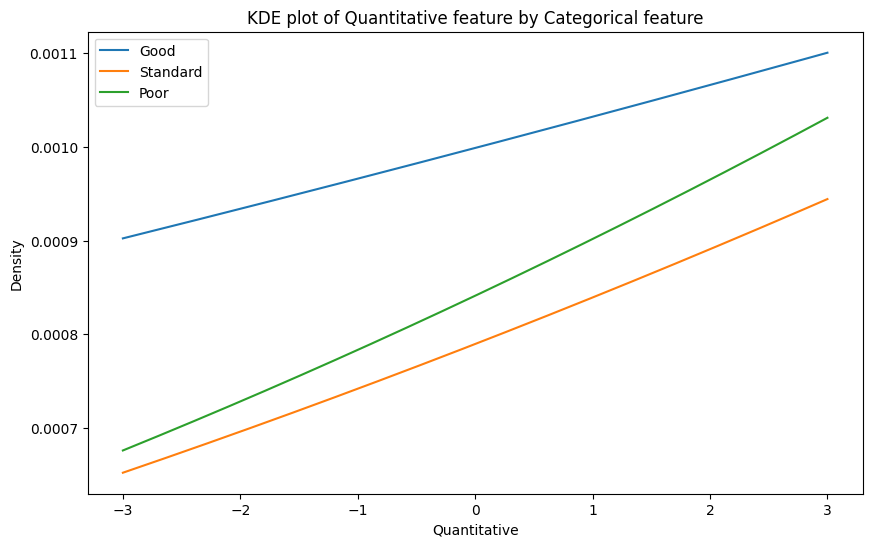

In [ ]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))
for category in categories:
    subset = df[df['Credit_Score'] == category]
    density = gaussian_kde(subset['Amount_invested_monthly'])
    xs = np.linspace(-3, 3, 200)
    plt.plot(xs, density(xs), label=category)
plt.title('KDE plot of Quantitative feature by Categorical feature')
plt.xlabel('Quantitative')
plt.ylabel('Density')
plt.legend()
plt.show()

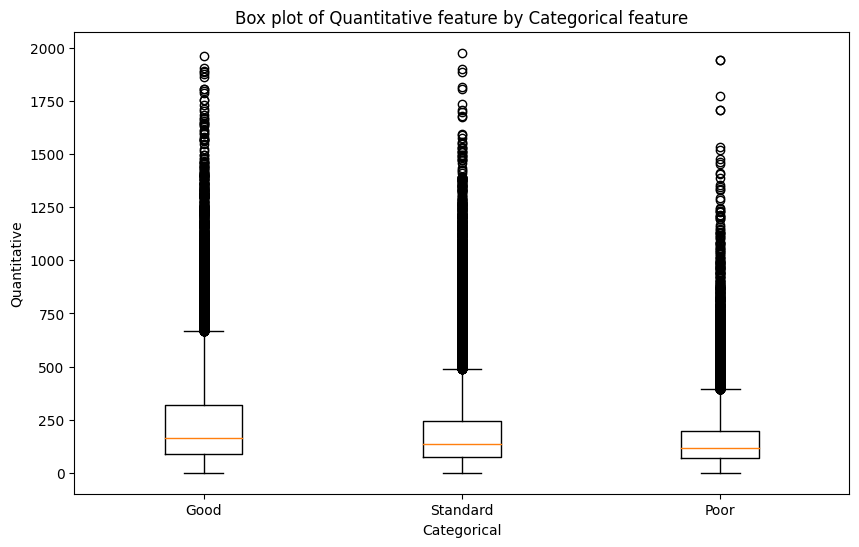

In [ ]:
plt.figure(figsize=(10, 6))
data_to_plot = [df[df['Credit_Score'] == category]['Amount_invested_monthly'] for category in categories]
plt.boxplot(data_to_plot, labels=categories)
plt.title('Box plot of Quantitative feature by Categorical feature')
plt.xlabel('Categorical')
plt.ylabel('Quantitative')
plt.show()

In [ ]:
#из графиков видим что зависимость слабая

In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg = np.mean(measurements)
    numerator = 0
    denominator = 0
    for i in range(cat_num):
        cat_measures = measurements.iloc[np.where(fcat == i)]
        cat_avg = np.mean(cat_measures)
        numerator += len(cat_measures) * (cat_avg - y_avg) ** 2
        denominator += np.sum((cat_measures - y_avg) ** 2)
    eta = np.sqrt(numerator / denominator)
    return eta

In [ ]:
categories = df['Credit_Score']
measurements = df['Amount_invested_monthly']

eta = correlation_ratio(categories, measurements)
print(f'Correlation ratio (eta): {eta}')

Correlation ratio (eta): 0.158711080345206


In [ ]:
'''
η близко к нулю, что значит что зависимость слабая
(что также было видно на графиках)
'''

'\nη близко к нулю, что значит что зависимость слабая\n(что также было видно на графиках)\n'

#12. Два категориальных признака (Credit_Score, Payment_of_Min_Amount)

In [ ]:
feature1=df['Credit_Score']
feature2=df['Payment_of_Min_Amount']

In [ ]:
table=pd.crosstab(df['Credit_Score'],df['Payment_of_Min_Amount'])
print(table)

Payment_of_Min_Amount    NM     No    Yes
Credit_Score                             
Good                   2245  13671   1912
Poor                   3518   4772  20708
Standard               6244  17224  29706


In [ ]:
def association_coefficient(contingency_table):
    chi2 = chi_square(contingency_table)
    n = contingency_table.sum().sum()
    return chi2 / n

def chi_square(contingency_table):
    expected = contingency_table.copy()
    total = contingency_table.sum().sum()
    for row in contingency_table.index:
        for col in contingency_table.columns:
            expected.at[row, col] = (contingency_table.loc[row].sum() * contingency_table[col].sum()) / total
    chi2 = ((contingency_table - expected) ** 2 / expected).sum().sum()
    return chi2



def contingency_coefficient(contingency_table):
    chi2 = chi_square(contingency_table)
    n = contingency_table.sum().sum()
    return (chi2 / (chi2 + n)) ** 0.5


def chuprovs_coefficient(contingency_table):
    chi2 = chi_square(contingency_table)
    n = contingency_table.sum().sum()
    k, m = contingency_table.shape
    return (chi2 / (n * (min(k, m) - 1))) ** 0.5


def pearsons_coefficient(contingency_table):
    chi2 = chi_square(contingency_table)
    n = contingency_table.sum().sum()
    k, m = contingency_table.shape
    return (chi2 / (chi2 + n * (min(k, m) - 1))) ** 0.5

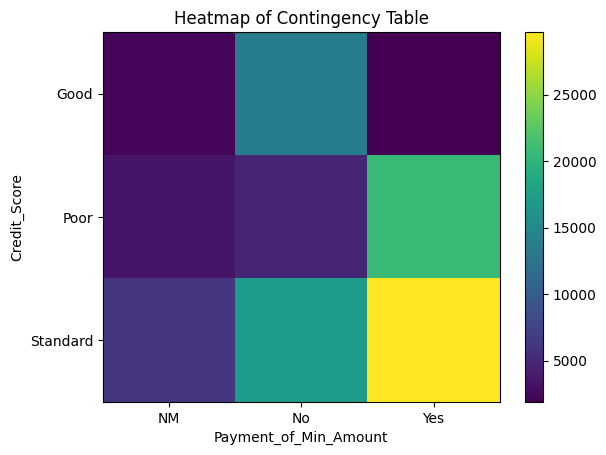

In [ ]:
def plot_heatmap(contingency_table):
    plt.imshow(contingency_table, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
    plt.yticks(range(len(contingency_table.index)), contingency_table.index)
    plt.xlabel('Payment_of_Min_Amount')
    plt.ylabel('Credit_Score')
    plt.title('Heatmap of Contingency Table')
    plt.show()

plot_heatmap(table)

In [ ]:
#из графика видим что зависимость умеренная;
#с ощутимым перевесом в пользу минимальных выплат и стандартной кредитной оценки

In [ ]:
assoc_coef = association_coefficient(table)
cont_coef = contingency_coefficient(table)
chuprov_coef = chuprovs_coefficient(table)
pearson_coef = pearsons_coefficient(table)

print(f"Коэффициент ассоциации: {assoc_coef}")
print(f"Коэффициент контингенции: {cont_coef}")
print(f"Коэффициент взаимной сопряженности Чупрова: {chuprov_coef}")
print(f"Коэффициент взаимной сопряженности Пирсона: {pearson_coef}")

Коэффициент ассоциации: 0.19620394791233223
Коэффициент контингенции: 0.404996486149018
Коэффициент взаимной сопряженности Чупрова: 0.3132123464299677
Коэффициент взаимной сопряженности Пирсона: 0.29889423388874925


In [ ]:
#из коэффициентов видим что связь умеренная (что также было видно на графике)